<h1><center>CSEN1022:Assignment 2</center></h1>
<h3><center>Winter 2021</center></h3>
<hr style="border:2px solid black"> </hr>

## <u> Please don't forget to fill in this data </u>
**Member 1**

Name: Abdallah Ragab 

GUC-ID: 43-14849

Elective Tutorial No.: T-02

**Member 2**

Name: Omar Hany

GUC-ID: 43-5802

Elective Tutorial No.: T-04

<hr style="border:2px solid black"> </hr>

## Imports (Don't Edit)

In [1]:
# ONLY USE THESE IMPORTS.
# PLEASE DON'T EDIT THIS CELL.
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
confusion_matrices_nb = []
confusion_matrices_gm = []

## Read Data

In [2]:
# X_train, X_test
# return (x_train, y_train), (x_test, y_test)

def read_data():
    x_train = []
    y_train = []

    x_train_airplane = np.array([plt.imread('Data/train/airplane/'+str(i)+'.jpg') for i in range (0,5000)])
    x_train_automobile = np.array([plt.imread('Data/train/automobile/'+str(i)+'.jpg') for i in range (0,5000)])
    x_train_frog = np.array([plt.imread('Data/train/frog/'+str(i)+'.jpg') for i in range (0,5000)])
    
    
    x_train = x_train_airplane
    x_train = np.append(x_train,x_train_automobile,axis=0)
    x_train = np.append(x_train,x_train_frog,axis = 0)
    
    for i in range(0,3):
        for j in range(0,5000):
            y_train.append(i)
            
    

    x_test = []
    y_test = []
    x_test_airplane = np.array([plt.imread('Data/test/airplane/'+str(i)+'.jpg') for i in range (0,1000)])
    x_test_automobile = np.array([plt.imread('Data/test/automobile/'+str(i)+'.jpg') for i in range (0,1000)])
    x_test_frog = np.array([plt.imread('Data/test/frog/'+str(i)+'.jpg') for i in range (0,1000)])
    
    
    x_test = x_test_airplane
    x_test = np.append(x_test,x_test_automobile,axis = 0)
    x_test = np.append(x_test,x_test_frog,axis = 0)
    
    
    for i in range(0,3):
        for j in range(0,1000):
            y_test.append(i)

    x_train = np.array(x_train)
    y_train = np.array(y_train)
    x_test = np.array(x_test)
    y_test = np.array(y_test)
    #normalize rgb
    x_train = x_train/255
    x_test = x_test/255
    return (x_train, y_train), (x_test, y_test)
(x_train,y_train),(X_test,y_test)=read_data()


################################################## 

x_train_rgb_32 = np.reshape(x_train,(len(x_train),3072))
x_test_rgb_32 =  np.reshape(X_test,(len(X_test),3072))

x_train_rgb_16 = np.array([ cv2.resize(image, (16,16), interpolation=cv2.INTER_AREA) for image in x_train])
x_test_rgb_16 =  np.array([ cv2.resize(image, (16,16), interpolation=cv2.INTER_AREA) for image in X_test])

x_train_rgb_16 = np.reshape(x_train_rgb_16,(len(x_train_rgb_16),768))
x_test_rgb_16 =  np.reshape(x_test_rgb_16,(len(x_test_rgb_16),768))


x_train_rgb_8 = np.array([ cv2.resize(image, (8,8), interpolation=cv2.INTER_AREA) for image in x_train])
x_test_rgb_8 =  np.array([ cv2.resize(image, (8,8), interpolation=cv2.INTER_AREA) for image in X_test])

x_train_rgb_8 = np.reshape(x_train_rgb_8,(len(x_train_rgb_8),192))
x_test_rgb_8 =  np.reshape(x_test_rgb_8,(len(x_test_rgb_8),192))


x_train_rgb_4 = np.array([ cv2.resize(image, (4,4), interpolation=cv2.INTER_AREA) for image in x_train])
x_test_rgb_4 =  np.array([ cv2.resize(image, (4,4), interpolation=cv2.INTER_AREA) for image in X_test])

x_train_rgb_4 = np.reshape(x_train_rgb_4,(len(x_train_rgb_4),48))
x_test_rgb_4 = np.reshape(x_test_rgb_4,(len(x_test_rgb_4),48))






<hr style="border:2px solid black"> </hr>

## Construct Naive Bayes classifier for each of the 3 classes.
#### Test each classifier on all images in X_Test. 
#### Construct Confusion Matrix.

In [3]:
def compute_confusion_matrix(expected, pred):
  K = len(np.unique(expected)) # Number of classes 
  result = np.zeros((K, K))

  for i in range(len(expected)):
    result[expected[i]][pred[i]] += 1

  return result
            

In [4]:
def meanAndVariance(x_train,y_train,label):
    x_train_label= [x_train[i] for i in range(len(x_train)) if y_train[i]==label]
    x_train_label=np.asarray(x_train_label)
    m_label = np.mean(x_train_label, axis=0)   
    var_label = np.var(x_train_label, axis=0)
    return  var_label,m_label

In [5]:
def naiveBayes(x_train,y_train,x_test,label):
    res= []
    var, mean = meanAndVariance(x_train,y_train,label)
    for i in range(3000):
        x =  (1 / np.sqrt(2 * np.pi * var)) * np.exp(-((x_test[i]-mean)**2 / (2 * var )))
        res.append(np.prod(x))
    return res


In [6]:
def correctness(Plane,Automobile,Frog,x_test):#rgb or grayscale
    correct=0
    predicted = []
    for i in range(len(x_test)):
        label=0
        if(Automobile[i]>Plane[i] and Automobile[i]>Frog[i]):
            label=1
        elif (Frog[i]>Plane[i] and Frog[i]>Automobile[i]):
            label=2
        predicted.append(label)
        if label==y_test[i]:
            correct+=1                         
    print(correct*100/len(x_test))
    return predicted

In [7]:
###########32x32
Plane32 = naiveBayes(x_train_rgb_32,y_train,x_test_rgb_32,0)
Automobile32 = naiveBayes(x_train_rgb_32,y_train,x_test_rgb_32,1)
Frog32 = naiveBayes(x_train_rgb_32,y_train,x_test_rgb_32,2)

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [8]:
predicted = correctness(Plane32,Automobile32,Frog32,x_test_rgb_32)

60.1


In [9]:
confusion_matrix_32 = compute_confusion_matrix(y_test,predicted)

In [10]:
confusion_matrix_32

array([[803., 100.,  97.],
       [334., 379., 287.],
       [334.,  45., 621.]])

In [11]:
###########16x16
Plane16 = naiveBayes(x_train_rgb_16,y_train,x_test_rgb_16,0)
Automobile16 = naiveBayes(x_train_rgb_16,y_train,x_test_rgb_16,1)
Frog16 = naiveBayes(x_train_rgb_16,y_train,x_test_rgb_16,2)

In [12]:
predicted = correctness(Plane16,Automobile16,Frog16,x_test_rgb_16)

64.3


In [13]:
confusion_matrix_16 = compute_confusion_matrix(y_test,predicted)

In [14]:
confusion_matrix_16

array([[723., 131., 146.],
       [255., 429., 316.],
       [170.,  53., 777.]])

In [15]:
###########8x8
Plane8 = naiveBayes(x_train_rgb_8,y_train,x_test_rgb_8,0)
Automobile8 = naiveBayes(x_train_rgb_8,y_train,x_test_rgb_8,1)
Frog8 = naiveBayes(x_train_rgb_8,y_train,x_test_rgb_8,2)

In [16]:
predicted = correctness(Plane8,Automobile8,Frog8,x_test_rgb_8)

63.733333333333334


In [17]:
confusion_matrix_8 = compute_confusion_matrix(y_test,predicted)

In [18]:
confusion_matrix_8

array([[713., 146., 141.],
       [253., 421., 326.],
       [165.,  57., 778.]])

In [19]:
###########4x4
Plane4 = naiveBayes(x_train_rgb_4,y_train,x_test_rgb_4,0)
Automobile4 = naiveBayes(x_train_rgb_4,y_train,x_test_rgb_4,1)
Frog4 = naiveBayes(x_train_rgb_4,y_train,x_test_rgb_4,2)

In [20]:
predicted = correctness(Plane4,Automobile4,Frog4,x_test_rgb_4)

61.3


In [21]:
confusion_matrix_4 = compute_confusion_matrix(y_test,predicted)

In [22]:
confusion_matrix_4

array([[682., 181., 137.],
       [256., 382., 362.],
       [164.,  61., 775.]])

In [23]:
#confusion_matrices_nb += [confusion_matrix]
confusion_matrices_nb=[]
confusion_matrices_nb += [confusion_matrix_32]
confusion_matrices_nb += [confusion_matrix_16]
confusion_matrices_nb += [confusion_matrix_8]
confusion_matrices_nb += [confusion_matrix_4]
confusion_matrices_nb


[array([[803., 100.,  97.],
        [334., 379., 287.],
        [334.,  45., 621.]]),
 array([[723., 131., 146.],
        [255., 429., 316.],
        [170.,  53., 777.]]),
 array([[713., 146., 141.],
        [253., 421., 326.],
        [165.,  57., 778.]]),
 array([[682., 181., 137.],
        [256., 382., 362.],
        [164.,  61., 775.]])]

<hr style="border:2px solid black"> </hr>

## Construct Gaussian Generative Model classifier for each of the 3 classes.
#### Test each classifier on all images in X_Test. 
#### Construct Confusion Matrix.

In [24]:
def calcS(mat):
    means = np.transpose([np.mean(mat, axis=0)])
    middle = mat - np.transpose(means)
    s = np.transpose(middle).dot(middle)
    return  len(mat)* s

In [25]:
def calcCovariance(mat):
    mat0= [mat[i] for i in range(len(mat)) if y_train[i]==0]
    mat1= [mat[i] for i in range(len(mat)) if y_train[i]==1]
    mat2= [mat[i] for i in range(len(mat)) if y_train[i]==2]
    return (calcS(mat0) +  calcS(mat1) +  calcS(mat2))/len(mat)

In [26]:
def extractClasses(x_train,label):
    res = [x_train[i] for i in range(len(x_train)) if y_train[i]==label]
    return  res

In [27]:
def calcMean(x_train,label):
    x_train_label= [x_train[i] for i in range(len(x_train)) if y_train[i]==label]
    x_train_label=np.asarray(x_train_label)
    m = np.mean(x_train_label, axis=0)   
    return  m

In [28]:
def getProb(x_test,inverseCovariance,mean):
    prob = []
    for photo in x_test:
        tmp = photo - mean
        res = tmp.dot(inverseCovariance)
        res = res.dot(np.transpose(tmp))
        res=np.exp(-0.5*res)
        prob.append(res)
    return prob

In [29]:
def likleyHood(x_train,x_test):
    covarianceMatrix = calcCovariance(x_train)
    inverseCovariance = np.linalg.pinv(covarianceMatrix)
    meanPlane = calcMean(x_train,0)
    meanAuto = calcMean(x_train,1)
    meanFrog = calcMean(x_train,2)
    probPlane = getProb(x_test,inverseCovariance,meanPlane)
    probAuto = getProb(x_test,inverseCovariance,meanAuto)
    probFrog = getProb(x_test,inverseCovariance,meanFrog)

    return probPlane,probAuto,probFrog


In [30]:
Plane32,Automobile32,Frog32 = likleyHood(x_train_rgb_32,x_test_rgb_32)

    

In [31]:
predicted = correctness(Plane32,Automobile32,Frog32,x_test_rgb_32)

74.4


In [32]:
confusion_matrix_32 = compute_confusion_matrix(y_test,predicted)

In [33]:
Plane16,Automobile16,Frog16 = likleyHood(x_train_rgb_16,x_test_rgb_16)


In [34]:
predicted = correctness(Plane16,Automobile16,Frog16,x_test_rgb_16)

78.3


In [35]:
confusion_matrix_16 = compute_confusion_matrix(y_test,predicted)

In [36]:
Plane8,Automobile8,Frog8 = likleyHood(x_train_rgb_8,x_test_rgb_8)


In [37]:
predicted = correctness(Plane8,Automobile8,Frog8,x_test_rgb_8)

77.8


In [38]:
confusion_matrix_8 = compute_confusion_matrix(y_test,predicted)

In [39]:
Plane4,Automobile4,Frog4 = likleyHood(x_train_rgb_4,x_test_rgb_4)


In [40]:
predicted = correctness(Plane4,Automobile4,Frog4,x_test_rgb_4)

76.23333333333333


In [41]:
confusion_matrix_4 = compute_confusion_matrix(y_test,predicted)

In [42]:
#confusion_matrices_gm += [confusion_matrix]
confusion_matrices_gm=[]
confusion_matrices_gm += [confusion_matrix_32]
confusion_matrices_gm += [confusion_matrix_16]
confusion_matrices_gm += [confusion_matrix_8]
confusion_matrices_gm += [confusion_matrix_4]
confusion_matrices_gm

[array([[769., 127., 104.],
        [192., 672., 136.],
        [ 83., 126., 791.]]),
 array([[797., 116.,  87.],
        [161., 721., 118.],
        [ 61., 108., 831.]]),
 array([[788., 126.,  86.],
        [174., 706., 120.],
        [ 58., 102., 840.]]),
 array([[778., 153.,  69.],
        [199., 684., 117.],
        [ 53., 122., 825.]])]

<hr style="border:2px solid black"> </hr>

## Repeat previous two confusion matrices for image sizes 16,8,4.
### Return confusion_matrices (array containing 8 matrices, 4 for naive bayes, 4 for gaussian generative model). 
#### confusion_matrices_nb = [confusion_matrix_nb_32, confusion_matrix_nb_16, confusion_matrix_nb_8, confusion_matrix_nb_4].
#### confusion_matrices_gm = [confusion_matrix_gm_32, confusion_matrix_gm_16, confusion_matrix_gm_8, confusion_matrix_gm_4].

In [43]:
confusion_matrices = confusion_matrices_nb + confusion_matrices_gm

<hr style="border:2px solid black"> </hr>

## The below 2 cells will only work if you return confusion_matrices (previous cell) with all 8 matrices in it.
## Please don't edit the below cells.
## Please run them and save the notebook before uploading so the script can check the saved image.
## Please don't change the order of the matrices.


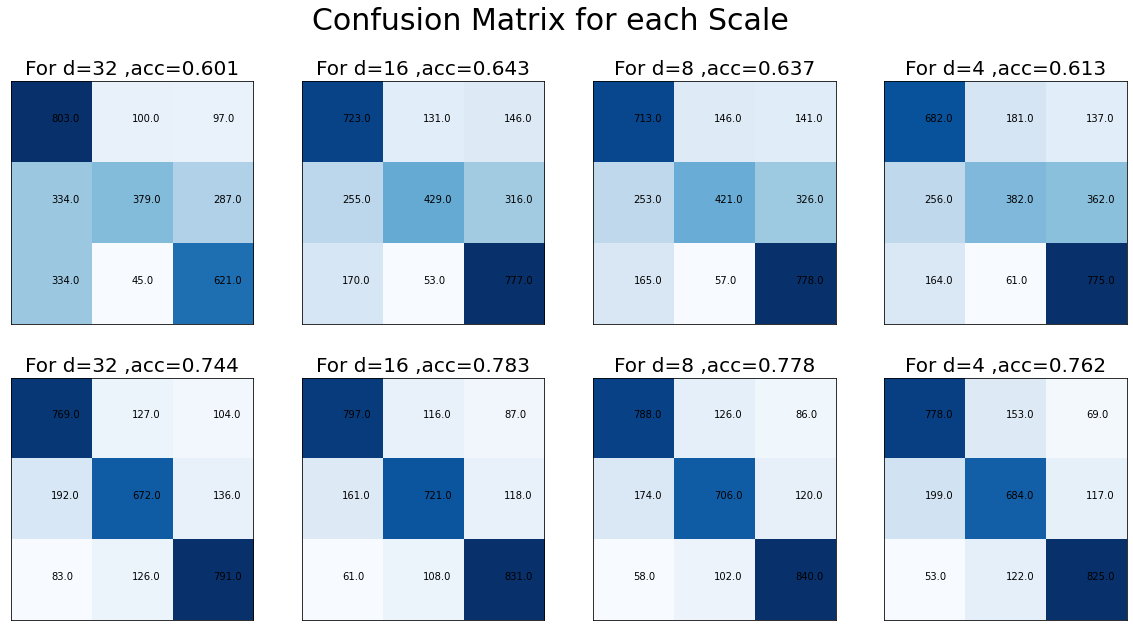

In [44]:
dims = [32,16,8,4,32,16,8,4]
fig, axs = plt.subplots(2, 4,figsize=(20,10))
fig.suptitle("Confusion Matrix for each Scale",fontsize=30)
for pi in range(0,axs.shape[0]):
    for pj in range(0,axs.shape[1]):
        index = np.round(pi*4+pj)
        cm = confusion_matrices[index]
        axs[pi,pj].matshow(cm,cmap="Blues")
        axs[pi,pj].set_title("For d="+str(dims[index])+" ,acc="+str(np.round(np.diag(cm).sum()/3000,3)),fontsize=20)
        for i in range(0,cm.shape[0]):
            for j in range(0,cm.shape[1]):
                axs[pi,pj].set_xticks([])
                axs[pi,pj].set_yticks([])
                axs[pi,pj].annotate(cm[i,j],(j,i))

Text(0.5, 1.0, 'NB VS GM')

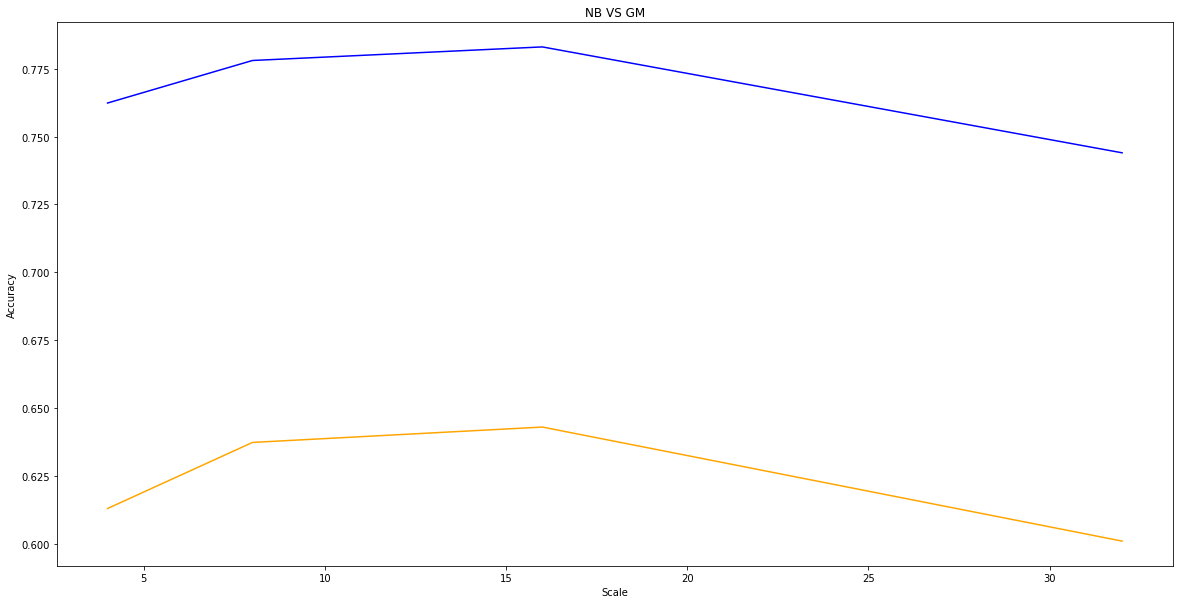

In [45]:
plt.figure(figsize=(20,10))
plt.plot(dims[:4],[np.diag(cm).sum()/3000 for cm in confusion_matrices_nb],color='orange')
plt.plot(dims[:4],[np.diag(cm).sum()/3000 for cm in confusion_matrices_gm],color='blue')
plt.xlabel('Scale')
plt.ylabel('Accuracy')
plt.title('NB VS GM')

<hr style="border:2px solid black"> </hr>

## Comment on the results ##

### 
The Poor performance of the NB relative to the GM is because NB assumes independence among feutures which is not the case pixels depends on each other in photos while GM solves this problem and calculate covariance between pixels. So Overall, GM performed better than NB in all four photos sizes. Photos the have the size of 16x16 performed the best in both models.

###